In [ ]:

import os
import pandas as pd
import re
import geopy.distance
print("program started")
# Convert CH y/x to WGS lat [lat = x = coordN, lng = y = coordE]
def transformCHtoWGS(y, x):
    # Axiliary values (% Bern)
    y_aux = (y - 2600000) / 1000000
    x_aux = (x - 1200000) / 1000000
    lat = (16.9023892 + (3.238272 * x_aux)) + \
            - (0.270978 * pow(y_aux, 2)) + \
            - (0.002528 * pow(x_aux, 2)) + \
            - (0.0447 * pow(y_aux, 2) * x_aux) + \
            - (0.0140 * pow(x_aux, 3))
    lat = (lat * 100) / 36

    lng = (2.6779094 + (4.728982 * y_aux) + \
            + (0.791484 * y_aux * x_aux) + \
            + (0.1306 * y_aux * pow(x_aux, 2))) + \
            - (0.0436 * pow(y_aux, 3))
    lng = (lng * 100) / 36
    return lat, lng


f1= pd.read_excel(r"compALL.xlsx")
f2=pd.read_excel(r"baseALL.xlsx")
adid=[
]
buildingid=[
]


######################################### Now If the work is all according to your needs as per you said in the last msg,
##### please dont hesitate to me full 5/5 star rating plus a good review, if you liked my service and most importantly my work ##########################################
################# if you need to ask anything, I am here to help ###################################################3
cityid=[]
f1_cityname=[
]
f2_cityname=[]
f1_lat=[]
f1_long=[]
f2_latlong=[]
distancelist=[]



program started


In [ ]:
threshold=5
f2_long=[]
f2_lat=[]
for i in range(0, len(f1)):
    print("index", i)
    for j in range(0, len(f2)):
        f1_x = str(f1['adCoordN'].loc[i])
        f1_y = str(f1['adCoordE'].loc[i])
        f2_x, f2_y = transformCHtoWGS(f2['coordE_MN95'].loc[j], f2['coordN_MN95'].loc[j])
        distance = geopy.distance.geodesic((f1_x, f1_y), (f2_x, f2_y)).km
        if distance <= threshold :
            print("got it", str(distance))
            adid.append(str(f1['adID'].iloc[i]))
            buildingid.append(str(f2['buildingID'].iloc[j]))
            cityid.append(str(f2['cityID'].iloc[j]))
            f1_cityname.append(str(f1['adCity'].iloc[i]))
            f2_cityname.append(str(f2['cityName'].iloc[j]))
            f1_lat.append(str(f1['adCoordN'].iloc[i]))
            f1_long.append(str(f1['adCoordE'].iloc[i]))
            f2_lat.append(str(f2_x))
            f2_long.append(str(f2_y))
            distancelist.append(str(distance))
            df = pd.DataFrame(
                {"adId": adid, "buildingID": buildingid, "cityID": cityid, "CityName ": f1_cityname, "f1_Lat": f1_lat,
                 "f1_Long": f1_long, "f2_lat": f2_lat , "f2_long": f2_long,  "distance": distancelist})
            df.to_csv("matched_city.csv")





index 0
got it 4.551098279581917
got it 3.343986692657477
got it 4.63424483589791
got it 1.780218512454656
got it 4.572046594225175
got it 0.608926140725422
got it 1.771765048422597
got it 4.56327235975026
got it 4.529674449536789
got it 4.052835442662612
got it 4.395350760245993
got it 4.419106481006275
got it 4.602691427185802
got it 4.600455632673067
got it 4.580194868197274
got it 4.577070871369096
got it 4.574057898856939
got it 4.7093988725884035
got it 4.685273627786302
got it 4.637542580189667
got it 4.5967322658360805
got it 4.743485263430591
got it 4.719669874724944
got it 4.860172726659461
got it 4.869667521226719
got it 4.625568468040128
got it 4.499674757826381
got it 4.675469543897732
got it 4.737340005492354
got it 1.2986357679177523
got it 1.2918378357391331
got it 1.4078760844790754
got it 1.3782405987789446
got it 1.9289410148183566
got it 2.2198034686503565
got it 2.279112787095188
got it 2.304446643256076
got it 2.464003957193021
got it 3.0736970001765647
got it 2.3

KeyboardInterrupt: ignored

In [ ]:


import pandas as pd
import folium
matched_df=pd.read_csv(r"matched_city.csv")
latitude = 46.8221486858913
longitude = 7.10435037538062
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=10)

pinpoints = folium.map.FeatureGroup()
for lat, lng, in zip(matched_df['f2_lat'], matched_df['f2_long']):
 pinpoints.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=2,
 color='red',
 fill=True,
 fill_color='maroon',
 fill_opacity=0.6
 )
)
sanfran_map.add_child(pinpoints)
sanfran_map

      Unnamed: 0     adId  buildingID  ...     f2_lat   f2_long  distance
0              0  A100016    11521050  ...  46.797180  7.151604  4.551098
1              1  A100016    11524334  ...  46.810102  7.144501  3.343987
2              2  A100016    11526451  ...  46.803694  7.158797  4.634245
3              3  A100016    11526533  ...  46.834255  7.119624  1.780219
4              4  A100016    11526882  ...  46.797021  7.151772  4.572047
...          ...      ...         ...  ...        ...       ...       ...
2676        2676  A100016     1524546  ...  46.804336  7.155050  4.346674
2677        2677  A100016     1524547  ...  46.804218  7.154516  4.316475
2678        2678  A100016     1524548  ...  46.803928  7.154821  4.352081
2679        2679  A100016     1524549  ...  46.803034  7.154983  4.410071
2680        2680  A100016     1524550  ...  46.804017  7.154971  4.357636

[2681 rows x 10 columns]


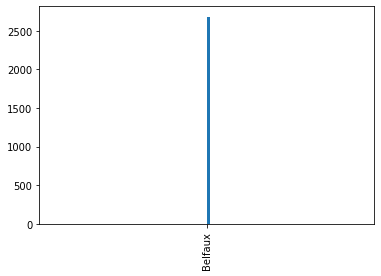

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv(r"matched_city.csv")
plt.hist(df['CityName '], bins=100)
plt.xticks(rotation="vertical")
plt.show()